# **Redes neuronales siamesas**

## **Preparacion codigo**

### **Importando modulos necesarios**

In [2]:
from __future__ import absolute_import,division,print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image as img
import cv2
from keras.optimizers import Adam
import unittest

from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Activation
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing import image

from keras.models import load_model

Using TensorFlow backend.


### **Funcion para calcular la distantica L1 punto a punto entre dos vectores y triplet loss**

In [4]:
def abs_diff_output_shape(input_shapes):
    shape1, shape2, shape3= input_shapes
    return shape1

def distance_vec(y_pred): #Cosine distance
    x = y_pred[0]
    y = y_pred[1]
    z = y_pred[2]
    negative = K.prod(K.stack([x, y], axis=1), axis=1)
    return negative

def get_abs_diff(y_pred):
    x = y_pred[0]
    y = y_pred[1]
    z = y_pred[2]
    return K.abs(x - y)

def triple_loss(y_true, y_pred):   # y_pred contiene la imagen ancla, positiva y negativa
    alpha = 0.1
  
    anchor = y_pred[0]
    positive = y_pred[1]
    negative = y_pred[2]
    
    positive_distance = K.mean(K.square(anchor-positive),axis=-1)  #En principio mean y sum hacen lo mismo excepto que una hace media y otro suma
    negative_distance = K.mean(K.square(anchor-negative),axis=-1)
  
    loss = positive_distance - negative_distance
    return K.maximum(loss + alpha, 0)   

In [ ]:
class TestSum(unittest.TestCase):

    def WhenIWantToGetAnImageThisMustBeRandom(self):
        img_groups = {'001' : '001'}
        group_names = list(img_groups.keys())
        image = get_random_image(img_groups,group_names,int('001'))
        self.asserEqual(image,'001001.jpg')
        
    def WhenIWantToCreateTripletThisMustBeCreated(self):
        array1 = create_triplet(1)
        array2 = ['001001.jpg','001023.jpg','004003.jpg']
        self.asserEqual(array,array2)
        
    def WhenIWantToLoadAndImageTheImageMustBeLoad(self):
        image = cv2.imread('/home/luis/dataset/' + '001' + '/' + '001001.jpg')
        image = cv2.resize(image, (96, 96))
        image2 = img_to_array(image)
        image1 = load_image('001001.jpg')
        self.asserEqual(image1,image2)
    def WhenIHaveMyTripletsIWantToLoadIt(slef):
        triplets = triples_batch(1,image_triples)
        images = np.empty([1,3,96,96,3])
        for index,i in enumerate(image_triples):
            ahs, phs, nhs= i
            a = (load_image(ahs),load_image(phs),load_image(nhs))
            images[index] = a
        self.asserEqual(triplets,images)
    def WhenIWantToReshapeMyTripletsThisMustBeReshape(self):
        triples_data = create_triplet(1)
        image_cache = {}
        tr_load_train = triples_batch(tr_train)
        tr_load_train_ = reshape(tr_load_train,(96,96,3))
        self.asserEqual(tr_load_val_a.shape,(96,96,3))
    def WhenIWantToCalculateTheLoss(self):
        y_true = 1
        triples_data = create_triplet(1)
        image_cache = {}
        tr_load_train = triples_batch(tr_train)
        y_pred = reshape(tr_load_train,(96,96,3))
        loss = triple_loss(y_true, y_pred)
        self.asserEqual(loss,0)
    
    def WhenIWantToCalculateTheCosineDistance(self):
        y_true = 1
        triples_data = create_triplet(1)
        image_cache = {}
        tr_load_train = triples_batch(tr_train)
        y_pred = reshape(tr_load_train,(96,96,3))
        distance = distance_vec(y_pred)
        self.asserEqual(distance,0)

  
        
if __name__ == '__main__':
    unittest.main()

### **Funcion para crear tripletas y cargar las imagenes**



In [ ]:
def get_random_image(img_groups, group_names, gid):
    gname = group_names[gid]
    photos = img_groups[gname]
    pid = np.random.choice(np.arange(len(photos)), size=1)[0]
    pname = photos[pid]
    return gname + pname + ".jpg"
   
def create_triplet(number_images,minImage,maxImage): # Crea tripleta
    img_groups = {}
    for folder in  sorted(os.listdir('/home/luis/dataset'),reverse=False):
        i = 0 
        for img_file in sorted(os.listdir('/home/luis/dataset/' + folder),reverse=False):
          #if i == number_images: # Para solo coger 40 fotos
            #break
            if i < minImage:
                i = i + 1
                continue
            if i > maxImage:
                break
            prefix, suffix = img_file.split(".")
            pid = prefix[3:]
            if folder in img_groups:
                img_groups[folder].append(pid)
            else:
                img_groups[folder] = [pid]
            i += 1
        pos_triples, neg_triples, labels = [], [], []
      # positive pairs and negative 
        group_names = list(img_groups.keys())
        for key in img_groups.keys():
            for i in range(0,number_images):
                for j in range(i+1,number_images): # Si dejo i me cogeria duplas con elementos iguales osea (001,001)
                    inc = random.randrange(1, classes+1)
                    dn = (int(key) + inc) % classes
                    right = get_random_image(img_groups, group_names, dn)
                    pos_triples.append((key + img_groups[key][i] + ".jpg", key + img_groups[key][j] + ".jpg", right))
    return pos_triples  

def load_image(image_name):
    image = cv2.imread('/home/luis/dataset/' + image_name[0:3] + '/' + image_name)
    image = cv2.resize(image, (96, 96))
    image = img_to_array(image)
    image = image / 255.0
    return image     
           
def triples_batch(tamaño,image_triples):#, batch_size): #Tripletas
    images = np.empty([tamaño,3,96,96,3],dtype="float16")
    for index,i in enumerate(image_triples):
        ahs, phs, nhs= i
        a = (load_image(ahs),load_image(phs),load_image(nhs))
        images[index] = a
    return images

In [24]:
def get_random_image2(img_groups, group_names, gid):     #Este metodo es para juntar todas con todas
    gname = group_names[gid]
    photos = img_groups[gname]
    pid = np.random.choice(np.arange(len(photos)), size=1)[0]
    pname = photos[pid]
    return gname + pname + ".jpg"
   
def create_triplet2(number_images,minImage,maxImage): # Crea tripleta
    img_groups = {}
    for folder in  sorted(os.listdir('/home/luis/dataset'),reverse=False):
        i = 0 
        for img_file in sorted(os.listdir('/home/luis/dataset/' + folder),reverse=False):
          #if i == number_images: # Para solo coger 40 fotos
            #break
            if i < minImage:
                i = i + 1
                continue
            if i > maxImage:
                break
            print(img_file)
            prefix, suffix = img_file.split(".")
            pid = prefix[3:]
            if folder in img_groups:
                 img_groups[folder].append(pid)
            else:
                 img_groups[folder] = [pid]
            i += 1
    pos_triples = []
      # positive pairs and negative 
    group_names = list(img_groups.keys())
    for key in img_groups.keys():
        for i in range(0,number_images):
            for j in range(i+1,number_images): # Si dejo i me cogeria duplas con elementos iguales osea (001,001)
                for k in img_groups.keys():
                    if k != key:
                        for l in range(0,number_images):
                            print((key + img_groups[key][i] + ".jpg", key + img_groups[key][j] + ".jpg", k + img_groups[k][l]))
                            pos_triples.append((key + img_groups[key][i] + ".jpg", key + img_groups[key][j] + ".jpg", k + img_groups[k][l]))
    return pos_triples

### **Crear red neuronal Convolucional**


In [25]:
def create_base_network(input_dim, classes): # SmallerVGGnet
    red = Sequential() 
    red.add(Conv2D(32, (3, 3), padding="same",input_shape=input_dim))
    red.add(Activation("relu"))
    red.add(BatchNormalization(axis=-1))
    red.add(MaxPooling2D(pool_size=(3, 3)))
    #red.add(Dropout(0.25))

    # (CONV => RELU) * 2 => POOL
    red.add(Conv2D(64, (3, 3), padding="same"))
    red.add(Activation("relu"))
    red.add(BatchNormalization(axis=-1))
    red.add(Conv2D(64, (3, 3), padding="same"))
    red.add(Activation("relu"))
    red.add(BatchNormalization(axis=-1))
    red.add(MaxPooling2D(pool_size=(2, 2)))
    #red.add(Dropout(0.25))

    # (CONV => RELU) * 2 => POOL
    red.add(Conv2D(128, (3, 3), padding="same"))
    red.add(Activation("relu"))
    red.add(BatchNormalization(axis=-1))
    red.add(Conv2D(128, (3, 3), padding="same"))
    red.add(Activation("relu"))
    red.add(BatchNormalization(axis=-1))
    red.add(MaxPooling2D(pool_size=(2, 2)))
    #red.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    red.add(Flatten())
    #red.add(Dense(2048))
    #red.add(Activation("relu"))
    #red.add(BatchNormalization())
    #red.add(Dropout(0.5))

    red.add(Dense(1024))
    red.add(Activation("relu"))
    red.add(BatchNormalization())
    red.add(Dropout(0.5))

    return red 

## **Principal**

### **Inicializar datos y normalizarlos**

In [5]:
number_images = 40 # Numero de imagenes cogidas
classes = 5 # Numero de pokemones
batch = 32
nb_epoch = 10

input_dim = (96,96,3) # Son el ancho el alto y la profundidad de la imagen, 3 al ser en color es la variable input_dim pero todavia no esta tocada

### Crear varias imagenes apartir de una moviendola o rotandola

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/home/luis/dataset',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 150x150
        batch_size=16,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# the data, shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = X_train.reshape(60000, input_dim)
#X_test = X_test.reshape(10000, input_dim)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/home/luis/database/108.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='/home/luis/', save_prefix='1', save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

### **Crear conjuntos de datos de entrenamiento y test** 


In [27]:
triples_data = create_triplet(number_images,0,number_images)

print("# image triples:", len(triples_data))

tm_train = 800
tm_val = 906

tr_train = triples_data[0:tm_train]
tr_val = triples_data[tm_train:tm_val]  #El tamaño tiene que ser par (No se mucho por que)

print("# image triples:", len(tr_train))
print("# image triples:", len(tr_val))

image_cache = {}

tr_load_train = triples_batch(800,tr_train)
tr_load_val = triples_batch(106,tr_val)



# image triples: 906
# image triples: 800
# image triples: 106


In [28]:
print("# image train triples:", len(tr_train))
[x for x in tr_train[0:5]]

print("# image validation triples:", len(tr_val))
[x for x in tr_val[0:5]]

print(tr_load_train.shape)

print(tr_load_val.shape)

# image train triples: 800
# image validation triples: 106
(800, 3, 96, 96, 3)
(106, 3, 96, 96, 3)


### **Crear red siamesa** 

In [29]:
# network definition
base_network = create_base_network(input_dim, classes)
#base_network.summary()


anchor_a = Input(shape=(input_dim))   #Nos da un tensor del tamaño input_dim
anchor_p = Input(shape=(input_dim))
anchor_n = Input(shape=(input_dim))


processed_a = base_network(anchor_a)
processed_p = base_network(anchor_p)
processed_n = base_network(anchor_n)

distance = Lambda(distance_vec, output_shape=abs_diff_output_shape)([processed_a, processed_p, processed_n])

pred = Dense(1, activation = 'sigmoid')(distance)

model = Model(inputs=[anchor_a, anchor_p, anchor_n], outputs=pred)


### **Entrenar modelo**


In [6]:
def reshape(data,dim):
    data_a = data[:, 0].reshape(-1, dim[0], dim[1], dim[2])
    data_p = data[:, 1].reshape(-1, dim[0], dim[1], dim[2])
    data_n = data[:, 2].reshape(-1, dim[0], dim[1], dim[2])
    return [data_a,data_p,data_n]

In [31]:
#Datos de entrenamiento

tr_load_train_ = reshape(tr_load_train,input_dim)
tr_load_train_a = tr_load_train_[0]
tr_load_train_p = tr_load_train_[1]
tr_load_train_n = tr_load_train_[2]

print(tr_load_train_a.shape)
print(tr_load_train_p.shape)
print(tr_load_train_n.shape)

#Datos de validacion

tr_load_val_ = reshape(tr_load_val,input_dim)
tr_load_val_a = tr_load_val_[0]
tr_load_val_p = tr_load_val_[1]
tr_load_val_n = tr_load_val_[2]

print(tr_load_val_a.shape)
print(tr_load_val_p.shape)
print(tr_load_val_n.shape)

(800, 96, 96, 3)
(800, 96, 96, 3)
(800, 96, 96, 3)
(106, 96, 96, 3)
(106, 96, 96, 3)
(106, 96, 96, 3)


In [32]:
INIT_LR = 1e-3
EPOCHS = 100
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss=triple_loss, optimizer=opt, metrics=["accuracy"])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 1024)         8673152     input_4[0][0]                    
                                                                 input_5[0][0]                    
          

In [33]:
train = np.ones(len(tr_load_train))
val = np.ones(len(tr_load_val))
a = model.fit([tr_load_train_a,tr_load_train_a,tr_load_train_a], train, batch_size=batch, epochs=nb_epoch, validation_data=([tr_load_val_a,tr_load_val_p,tr_load_val_n], val))

Train on 800 samples, validate on 106 samples
Epoch 1/10
800/800 [==============================] - 45s 57ms/step - loss: 0.1777 - acc: 0.3075 - val_loss: 0.1979 - val_acc: 0.2547
Epoch 2/10
800/800 [==============================] - 46s 58ms/step - loss: 0.2744 - acc: 0.2988 - val_loss: 0.4962 - val_acc: 0.2642
Epoch 3/10
800/800 [==============================] - 49s 61ms/step - loss: 0.2113 - acc: 0.1813 - val_loss: 0.3623 - val_acc: 0.5094
Epoch 4/10
800/800 [==============================] - 50s 63ms/step - loss: 0.1812 - acc: 0.1537 - val_loss: 0.6702 - val_acc: 0.3113
Epoch 5/10
800/800 [==============================] - 48s 60ms/step - loss: 0.1634 - acc: 0.0975 - val_loss: 0.4810 - val_acc: 0.6604
Epoch 6/10
800/800 [==============================] - 50s 62ms/step - loss: 0.1080 - acc: 0.0537 - val_loss: 0.4018 - val_acc: 0.1604
Epoch 7/10
800/800 [==============================] - 48s 60ms/step - loss: 0.0919 - acc: 0.0312 - val_loss: 0.6698 - val_acc: 0.2453
Epoch 8/10
800/8

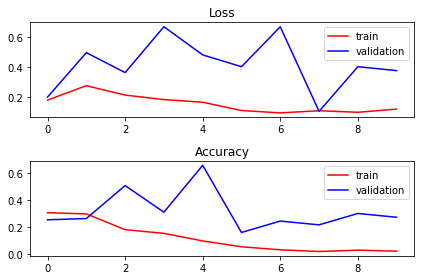

In [34]:
plt.subplot(211)
plt.title("Loss")
plt.plot(a.history["loss"], color="r", label="train")
plt.plot(a.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(a.history["acc"], color="r", label="train")
plt.plot(a.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [35]:
for i in range(0,(int)(40/number_images)):
    print((str)(i*number_images) + ' '+ (str)(i*number_images+number_images-1))   

0 3
4 7
8 11
12 15
16 19
20 23
24 27
28 31
32 35
36 39


In [36]:
for i in range(0,(int)(40/number_images)):
    triples_data = create_triplet(number_images,i*number_images,i*number_images+number_images-1)

    print("# image triples:", len(triples_data))

    tm_train = 800
    tm_val = 906

    tr_train = triples_data[0:tm_train]
    tr_val = triples_data[tm_train:tm_val]  #El tamaño tiene que ser par (No se mucho por que)

    print("# image triples:", len(tr_train))
    print("# image triples:", len(tr_val))

    tr_load_train = triples_batch(800,tr_train)
    tr_load_val = triples_batch(106,tr_val)

    #Datos de entrenamiento

    tr_load_train_ = reshape(tr_load_train,input_dim)
    tr_load_train_a = tr_load_train_[0]
    tr_load_train_p = tr_load_train_[1]
    tr_load_train_n = tr_load_train_[2]

    #Datos de validacion

    tr_load_val_ = reshape(tr_load_val,input_dim)
    tr_load_val_a = tr_load_val_[0]
    tr_load_val_p = tr_load_val_[1]
    tr_load_val_n = tr_load_val_[2]

    train = np.ones(len(tr_load_train))
    val = np.ones(len(tr_load_val))
    a = model.fit([tr_load_train_a,tr_load_train_a,tr_load_train_a], train, batch_size=batch, epochs=nb_epoch, validation_data=([tr_load_val_a,tr_load_val_p,tr_load_val_n], val))

# image triples: 906
# image triples: 800
# image triples: 106
Train on 800 samples, validate on 106 samples
Epoch 1/10
256/800 [========>.....................] - ETA: 26s - loss: 0.1000 - acc: 0.0039    

KeyboardInterrupt: 

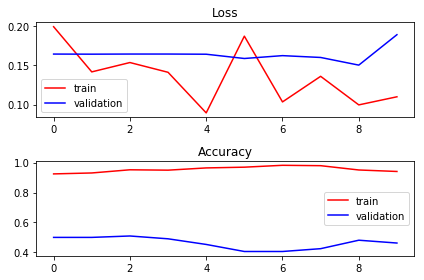

In [28]:
plt.subplot(211)
plt.title("Loss")
plt.plot(a.history["loss"], color="r", label="train")
plt.plot(a.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Accuracy")
plt.plot(a.history["acc"], color="r", label="train")
plt.plot(a.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [ ]:
model.save('my_model.h5')
del model

In [7]:
model = load_model('my_model.h5', custom_objects={'triple_loss': triple_loss})

# **Test y prueba en funcionamiento**

## **Test**

In [9]:
def load_data(name, file):
    if file == 1:
        image = cv2.imread('/home/luis/database3/' + name + '.jpg')
    else:
        image = cv2.imread('/home/luis/' + name + '.jpg')
    image = cv2.resize(image, (96, 96))
    image = img_to_array(image)
    return image  

def evaluate_data(name):
    values = []
    for i in range(1,classes+1):
        images = []
        name1 = str(i)
        len_name = len(name1)
        if len_name == 1:
            name1= '00' + name1
        elif len_name == 2:
            name1= '0' + name1
        #print(name + ' ' + name1 + ' ' + name1)
        images.append((load_data(name, 0),load_data(name1, 1),load_data(name1, 1)))
        data = np.array(images, dtype="float") / 255.0
        data = reshape(data,input_dim)
        a = model.predict([data[0],data[1],data[2]])
        #print(a)
        values.append(a)
    return values

def draw_image(subplot, image, title):
    plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
def compare(array1,array2):
    a = 0
    for i in range(0,(len(array1))):
        print(array1[i],array2[i])
        if array1[i] == array2[i]:
            a = a + 1
    return a

1 [[0.99997246]]
2 [[3.0364466e-10]]
3 [[0.9999993]]
4 [[6.7169574e-17]]
5 [[0.9999938]]
Tu pokemon es el 4 [[6.7169574e-17]]


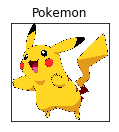

In [33]:
x = evaluate_data('026')
for index,i in enumerate(x):
    print(index+1,i)
var = 1000
index_var = 0
for index,j in enumerate(x):
     if j <= var:
        var = j
        index_var=index
print('Tu pokemon es el',index_var+1,var)
ref_image = plt.imread(os.path.join('/home/luis/database3/' + '00' +(str)(index_var+1) + '.jpg'))
draw_image(131,ref_image, "Pokemon")

In [ ]:
            ['001','002','003','004','005','006','007','008','009',
            '010','011','012','013','014','015','016','017','018','019',
            '020','021','022','023','024','025','026','027','028','029',
            '030','031','032','033','034','035','036','037','038','039',
            '040','041','042','043','044','045','046','047','048','049',
            '050','051','052','053','054','055','056','057','058','059',
            '060','061','062','063','064','065','066','067','068','069',
            '070','071','072','073','074','075','076','077','078','079',
            '080','081','082','083','084','085','086','087','088','089',
            '090','091','092','093','094','095','096','097','098','099',
            '100','101','102','103','104','105','106','107','108','109',
            '110','111','112','113','114','115','116','117','118','119',
            '120','121','122','123','124','125','126','127','128','129',
            '130','131','132','133','134','135','136','137','138','139',
            '140','141','142','143','144','145','146','147','148','149',
            '150','151']

In [26]:
imagenes = ['001','002','003','004','005','006','007','008','009',
            '010','011','012','013','014','015','016','017','018','019',
            '020','021','022','023','024','025','026','027','028','029',
            '030','031','032','033','034','035']
images = [1,1,2,2,3,3,4,4,5,6,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]

values = []
for i in range(0,35):
    x = evaluate_data(imagenes[i])
    values.append(x)


1 [[0.00012012]]
1 [[9.054039e-11]]
4 [[4.893363e-10]]
4 [[2.2078983e-09]]
5 [[2.246831e-07]]
3 [[2.548882e-09]]
4 [[3.576211e-14]]
4 [[2.0723099e-16]]
1 [[1.7298516e-06]]
5 [[4.4829415e-13]]
3 [[2.0952783e-05]]
3 [[1.345732e-05]]
1 [[0.00012012]]
1 [[2.1034574e-10]]
3 [[3.0220539e-05]]
4 [[4.893363e-10]]
4 [[6.80436e-09]]
4 [[1.0035081e-11]]
4 [[7.674948e-07]]
4 [[8.631923e-09]]
3 [[7.58756e-05]]
3 [[1.191945e-08]]
1 [[0.18953843]]
5 [[5.1675957e-09]]
3 [[6.3723232e-06]]
4 [[6.7169574e-17]]
4 [[7.667962e-10]]
5 [[4.991201e-13]]
4 [[2.0723099e-16]]
4 [[1.2436451e-18]]
5 [[5.4908866e-13]]
5 [[4.718225e-13]]
5 [[4.0977326e-13]]
5 [[4.4829415e-13]]
5 [[4.6835707e-13]]
1 1
1 1
4 2
4 2
5 3
3 3
4 4
4 4
1 5
5 6
3 1
3 1
1 1
1 1
3 1
4 2
4 2
4 2
4 2
4 2
3 3
3 3
1 3
5 3
3 3
4 4
4 4
5 4
4 4
4 4
5 5
5 5
5 5
5 5
5 5
El % de aciertos es:  54.285714285714285 %


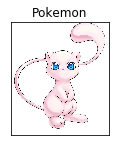

In [37]:
aciertos = []
for i in values:
    var = 1000
    index_var = 0
    for index,j in enumerate(i):
        if j <= var:
            var = j
            index_var=index
    print(index_var+1,var)
    aciertos.append(index_var+1)
 
#Accuracy y Matriz de confusión
imagenes = list(map(int, imagenes))
accuracy = compare(aciertos, images)
print('El % de aciertos es: ', (accuracy/35)*100, '%')